In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

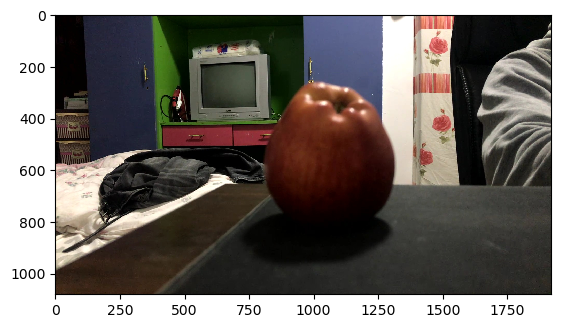

In [3]:
img = cv2.imread(os.path.join('collected_images', 'Apple', 'Apple0.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
data = tf.keras.utils.image_dataset_from_directory('collected_images')

Found 1293 files belonging to 2 classes.


2022-12-31 22:42:31.841176: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aliub20/.local/lib/python3.8/site-packages/cv2/../../lib64:/home/aliub20/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-12-31 22:42:31.841238: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-31 22:42:31.841266: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aliub20): /proc/driver/nvidia/version does not exist
2022-12-31 22:42:31.841605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations,

In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()   #Images and labels (2)

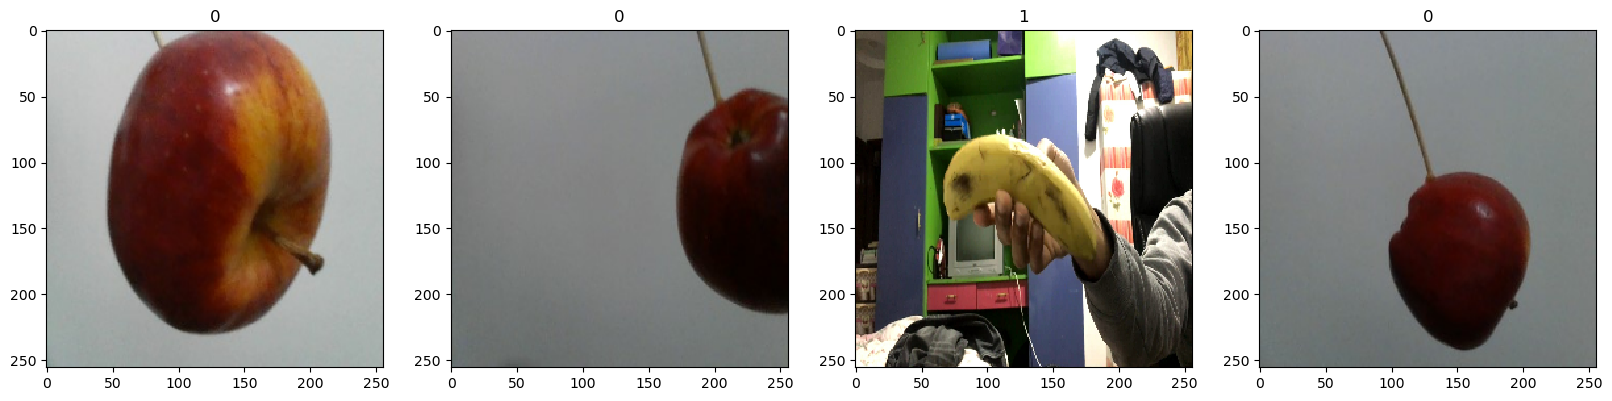

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [9]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

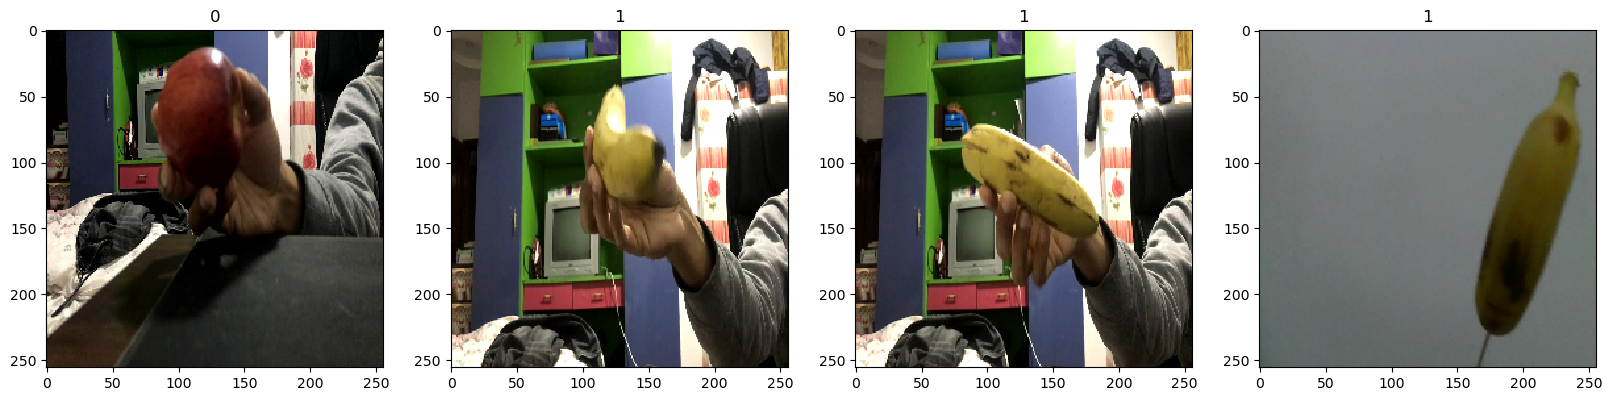

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [11]:
print(len(data))
train_size = int(len(data)*0.5)
val_size = int(len(data)*0.2)+1   #Evaluate data while we train
test_size = int(len(data)*0.3)+1   #Hold that all the way until the end
print(train_size)
print(val_size)
print(test_size)

41
20
9
13


In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
model = Sequential()

model.add(Flatten(input_shape = (256,256,3)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

2022-12-31 22:43:16.547419: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 100663296 exceeds 10% of free system memory.
2022-12-31 22:43:16.612721: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 100663296 exceeds 10% of free system memory.
2022-12-31 22:43:16.642732: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 100663296 exceeds 10% of free system memory.


In [15]:
model.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 128)               25165952  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 25,174,273
Trainable params: 25,174,273
Non-trainable params: 0
_________________________________________________________________


In [17]:
logdir = 'logs'

In [18]:
tensorboard_calback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [19]:
hist = model.fit(train, epochs=10, validation_data= val, callbacks= [tensorboard_calback])

Epoch 1/10


2022-12-31 22:43:26.424569: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 100663296 exceeds 10% of free system memory.
2022-12-31 22:43:26.435627: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 100663296 exceeds 10% of free system memory.


20/20 [==============================] - 10s 445ms/step - loss: 8.0897 - accuracy: 0.7797 - val_loss: 2.2975 - val_accuracy: 0.8542
Epoch 2/10
20/20 [==============================] - 9s 417ms/step - loss: 1.6127 - accuracy: 0.8672 - val_loss: 1.7464 - val_accuracy: 0.8333
Epoch 3/10
20/20 [==============================] - 8s 407ms/step - loss: 2.3833 - accuracy: 0.8297 - val_loss: 2.2208 - val_accuracy: 0.8542
Epoch 4/10
20/20 [==============================] - 8s 378ms/step - loss: 0.8808 - accuracy: 0.8891 - val_loss: 0.4902 - val_accuracy: 0.9479
Epoch 5/10
20/20 [==============================] - 8s 380ms/step - loss: 0.7500 - accuracy: 0.8938 - val_loss: 0.3148 - val_accuracy: 0.9236
Epoch 6/10
20/20 [==============================] - 8s 370ms/step - loss: 0.2884 - accuracy: 0.9328 - val_loss: 0.6680 - val_accuracy: 0.9097
Epoch 7/10
20/20 [==============================] - 8s 366ms/step - loss: 0.4410 - accuracy: 0.9094 - val_loss: 1.0844 - val_accuracy: 0.8681
Epoch 8/10
20/20

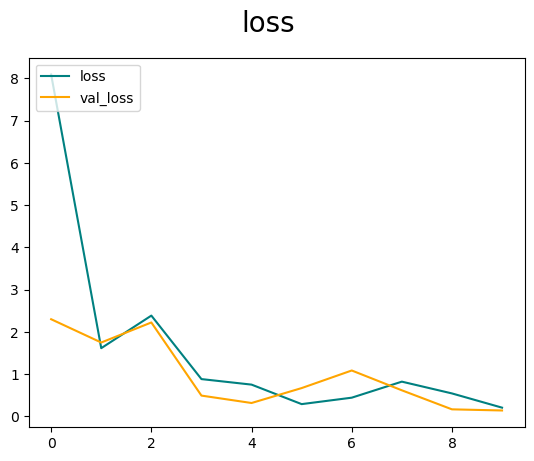

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

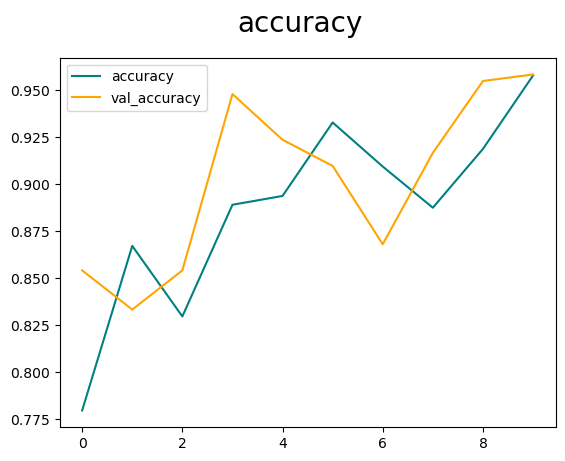

In [21]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [22]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy 

In [23]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [24]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 56ms/step


In [25]:
print(f'Precision{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision0.9841269850730896, Recall:0.9346733689308167, Accuracy:0.9561643600463867


In [28]:
#Connect to webcam
cap = cv2.VideoCapture(-1)

#establishes a loop to every frame until we close the webcam
while cap.isOpened():
    ret, frame = cap.read()
    #show image
    cv2.imshow('Webcam', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('c'):
        cv2.imwrite("appleshot.jpg", frame)

    elif cv2.waitKey(1) & 0xFF == ord('v'):
        cv2.imwrite("bananashot.jpg", frame)

    #Checks wheter q has ben hit and stops the loop
    elif cv2.waitKey(1) & 0xFF ==ord('q'):
        break
    
#release the webcam
cap.release()
#closes the frame
cv2.destroyAllWindows()

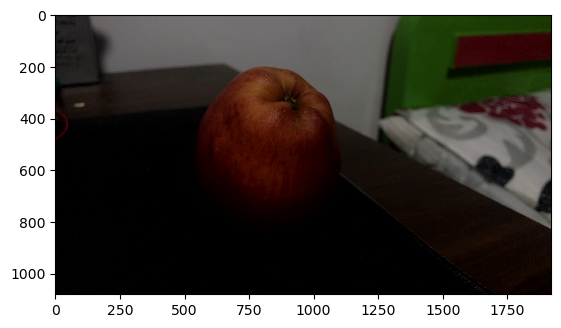

(1080, 1920, 3)

In [26]:
img = cv2.imread('bananashot.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img.shape

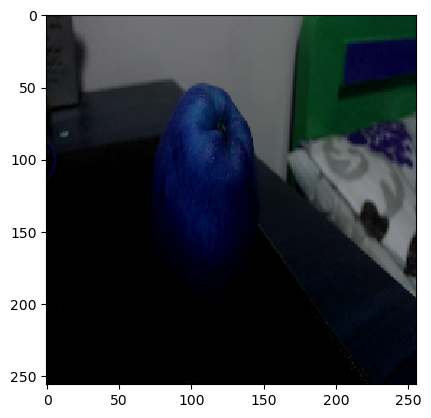

TensorShape([256, 256, 3])

In [27]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
resize.shape

In [28]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [29]:
yhat

array([[2.0458676e-06]], dtype=float32)

In [30]:
if yhat >0.5:
    print("Predicted class is Banana")
else:
    print("Predicted class is Apple")

Predicted class is Apple


In [31]:
from tensorflow.keras.models import load_model

In [32]:
model.save(os.path.join('models', 'ANN_BA.h5'))

In [33]:
new_model = load_model(os.path.join('models','ANN_BA.h5'))

In [35]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 80ms/step


In [36]:
if yhatnew >0.5:
    print("Predicted class is Banana")
else:
    print("Predicted class is Apple")

Predicted class is Apple
